<a href="https://colab.research.google.com/github/darguellesUOC/VD_PEC2/blob/main/BulletGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Country  2019  BAU 2030  Target 2030
0  Saudi Arabia    37        42           40
1         Egypt    19        23           26
2           UAE    14        12           11
3        Kuwait     8         5            5
4         Qatar     8         6            7


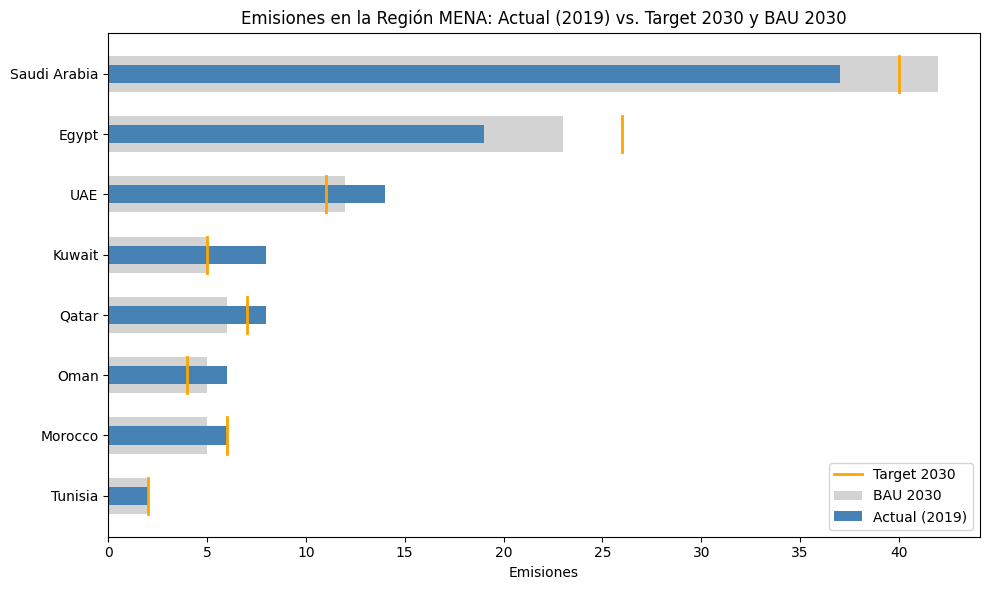

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Share of target emissions compared to business as usual in the Middle East and North Africa in 2030, by country
#Enlace: https://www-statista-com.eu1.proxy.openathens.net/statistics/1451707/mena-target-emissions-business-as-usual-by-country/

# Cargar el archivo CSV en un DataFrame
file_path = '/content/target emissions MENA.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para confirmar que se cargó correctamente
print(df.head())

# Graficar el Bullet Graph
fig, ax = plt.subplots(figsize=(10, 6))

# Bucle a través de cada país para crear un gráfico de barras horizontal para cada uno
for i, row in df.iterrows():
    country = row['Country']
    actual = row['2019']  # Emisiones actuales para 2019
    bau_2030 = row['BAU 2030']
    target_2030 = row['Target 2030']

    # Posición en el eje y (utilizando el índice directamente)
    y_pos = i

    # Graficar el rango Business as Usual (BAU 2030) como una barra de fondo
    ax.barh(y_pos, bau_2030, color='lightgrey', edgecolor='none', height=0.6, label='BAU 2030' if i == 0 else "")

    # Graficar el valor Actual (2019) como la barra principal, en frente del BAU 2030
    ax.barh(y_pos, actual, color='steelblue', height=0.3, label='Actual (2019)' if i == 0 else "")

    # Graficar la línea de Target 2030 como una línea vertical
    ax.plot([target_2030, target_2030], [y_pos - 0.3, y_pos + 0.3], color='orange', linewidth=2, label='Target 2030' if i == 0 else "")

# Etiquetas y estética
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['Country'])
ax.set_xlabel('Emisiones')
ax.set_title('Emisiones en la Región MENA: Actual (2019) vs. Target 2030 y BAU 2030')

# Añadir la leyenda
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Mostrar el gráfico
plt.gca().invert_yaxis()  # Invertir el eje y para una mejor legibilidad
plt.tight_layout()
plt.show()